<a href="https://colab.research.google.com/github/subbu30122003/bharatintern_ml/blob/main/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data=pd.read_csv("movie.csv")
data.head(5)

,name,date,score,genre,overview,crew,title,status,language,budget,revenue,country
0,Creed III,03-02-2023,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04-05-2023,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01-05-2023,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [ ]:
data.columns

Index(['name', 'date', 'score', 'genre', 'overview', 'crew', 'title', 'status',
       'language', 'budget', 'revenue', 'country'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10178 non-null  object 
 1   date      10178 non-null  object 
 2   score     10178 non-null  int64  
 3   genre     10093 non-null  object 
 4   overview  10178 non-null  object 
 5   crew      10122 non-null  object 
 6   title     10178 non-null  object 
 7   status    10178 non-null  object 
 8   language  10178 non-null  object 
 9   budget    10178 non-null  float64
 10  revenue   10178 non-null  float64
 11  country   10178 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 954.3+ KB


In [ ]:
data.describe()

,score,budget,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [ ]:
data.shape

(10178, 12)

In [ ]:
data.isnull().sum()

name         0
date         0
score        0
genre       85
overview     0
crew        56
title        0
status       0
language     0
budget       0
revenue      0
country      0
dtype: int64

In [ ]:
#check number of unique values in each column
pd.DataFrame(data.nunique())

,0
name,9660
date,5688
score,79
genre,2303
overview,9905
crew,9927
title,9736
status,3
language,54
budget,2316


In [ ]:
#to find duplicate values
dupli=data[data.duplicated("title")]
dupli["title"].value_counts()


Pinocchio    11
Halloween     8
King Kong     8
Scream        5
After         5
             ..
 Hayat        1
Revenge       1
Cars          1
Cashback      1
Payback       1
Name: title, Length: 268, dtype: int64

In [ ]:
data.drop_duplicates(subset="title",inplace=True)

In [ ]:
data["date"]=data["date"].str. strip()
data["date"] = pd.to_datetime(data["date"], format="%m/%d/%Y", errors='coerce')
data["date"].fillna(pd.to_datetime(data["date"], format="%m-%d-%Y", errors='coerce'), inplace=True)

data["Release_year"]=data["date"].dt.year
data["Release_month"]=data["date"].dt.month

In [ ]:
data=data.dropna()
recommended=data.copy()

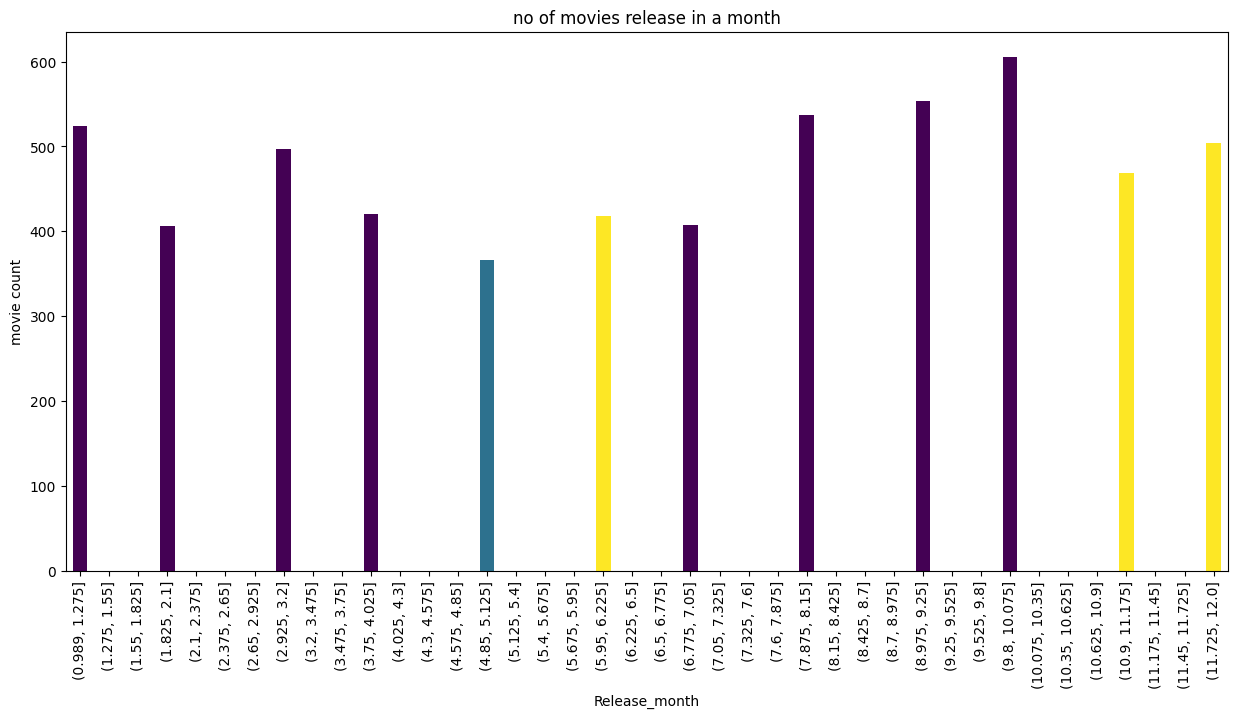

In [ ]:
# plot the graph between month and number of movies
colors=plt.cm.viridis(np.linspace(-7,3,20))
plt.figure(figsize=(15,7))
data.groupby(pd.cut(data["Release_month"],bins=40))["name"].agg("count").plot(kind="bar",color=colors)
plt.title("no of movies release in a month")
plt.ylabel("movie count")
plt.show()

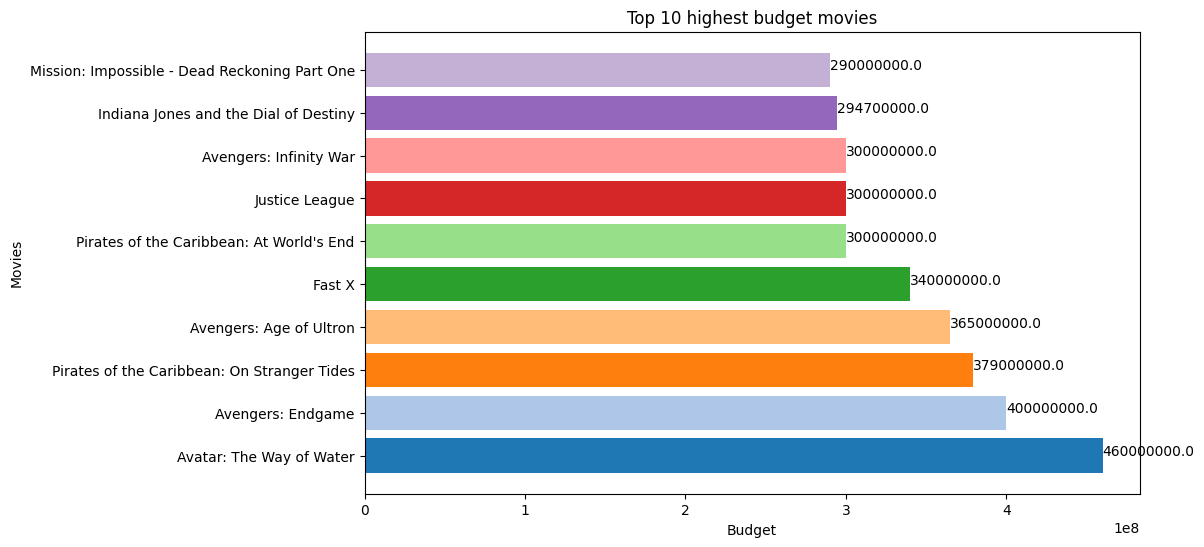

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
max_budget = data.sort_values('budget', ascending=False).head(10)
col_map = plt.get_cmap('tab20')
axs.barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs.set_title('Top 10 highest budget movies')
axs.set_xlabel('Budget')
axs.set_ylabel('Movies')
for i in range(len(max_budget)):
    axs.text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])


In [ ]:
max_revenue = data.sort_values('revenue', ascending=False).head(10)

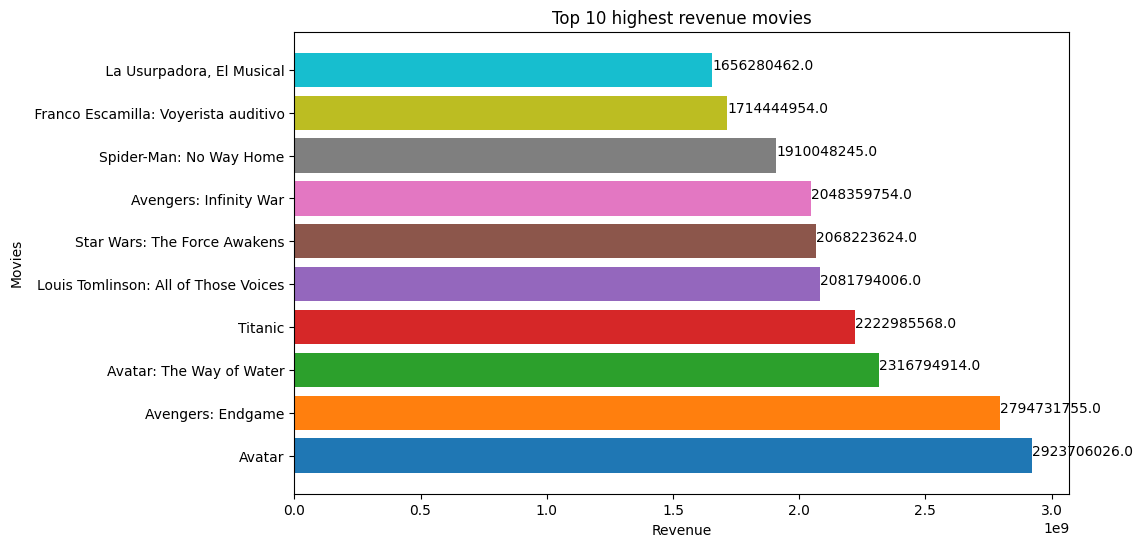

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
col_map = plt.get_cmap('tab10')
axs.barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs.set_title('Top 10 highest revenue movies')
axs.set_xlabel('Revenue')
axs.set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs.text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

In [ ]:
#number of movies with same language
data["language"].value_counts()

 English                                4135
 Japanese                                398
 Spanish, Castilian                      241
 Korean                                  227
 French                                  155
 Chinese                                  96
 Italian                                  85
 Cantonese                                81
 German                                   49
 Russian                                  44
 Tagalog                                  24
 Portuguese                               23
 Polish                                   16
 Hindi                                    15
 Norwegian                                15
 Thai                                     14
 Swedish                                  13
 Danish                                   13
 Dutch, Flemish                            9
 Turkish                                   7
 Finnish                                   5
 Indonesian                                5
 Greek    

In [ ]:
genres_col = data['genre']
count= set()
for genres_string in genres_col:
    genres_list = genres_string.split(',')
    count.update(genres_list)
print("no of all unique genres is",len(count))


no of all unique genres is 38


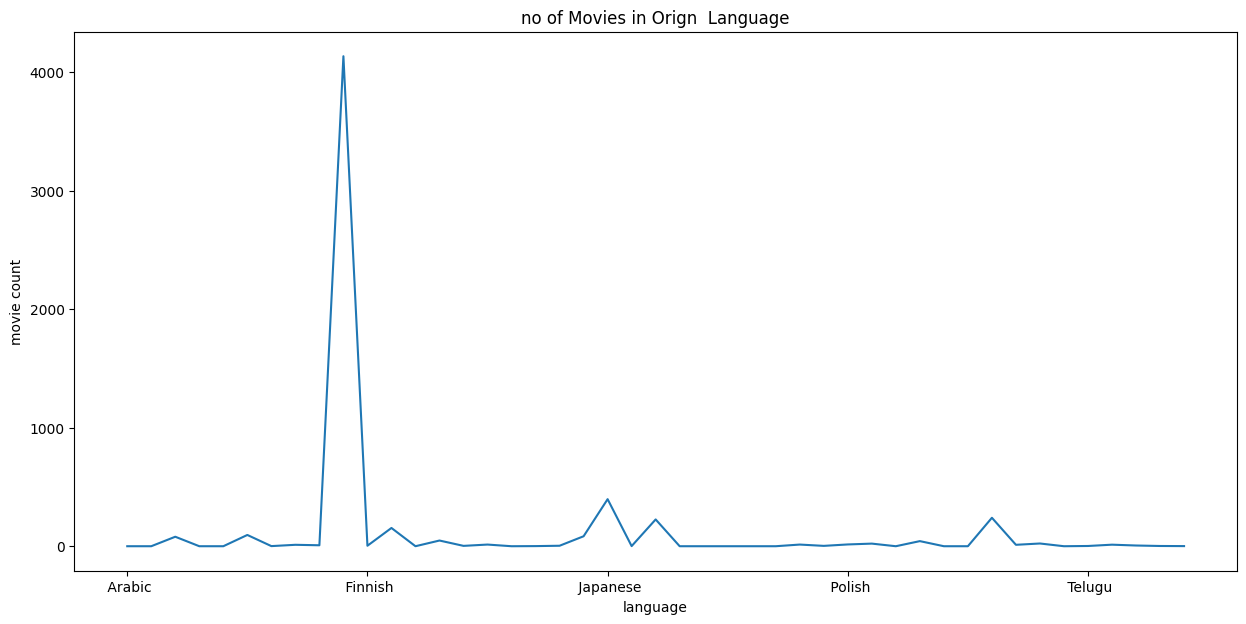

In [ ]:
#plot the graph between no of movies in their own language
plt.figure(figsize=(15,7))
data.groupby("language")["name"].agg("count").plot(kind="line")
plt.title("no of Movies in Orign  Language")
plt.ylabel("movie count")
plt.show()

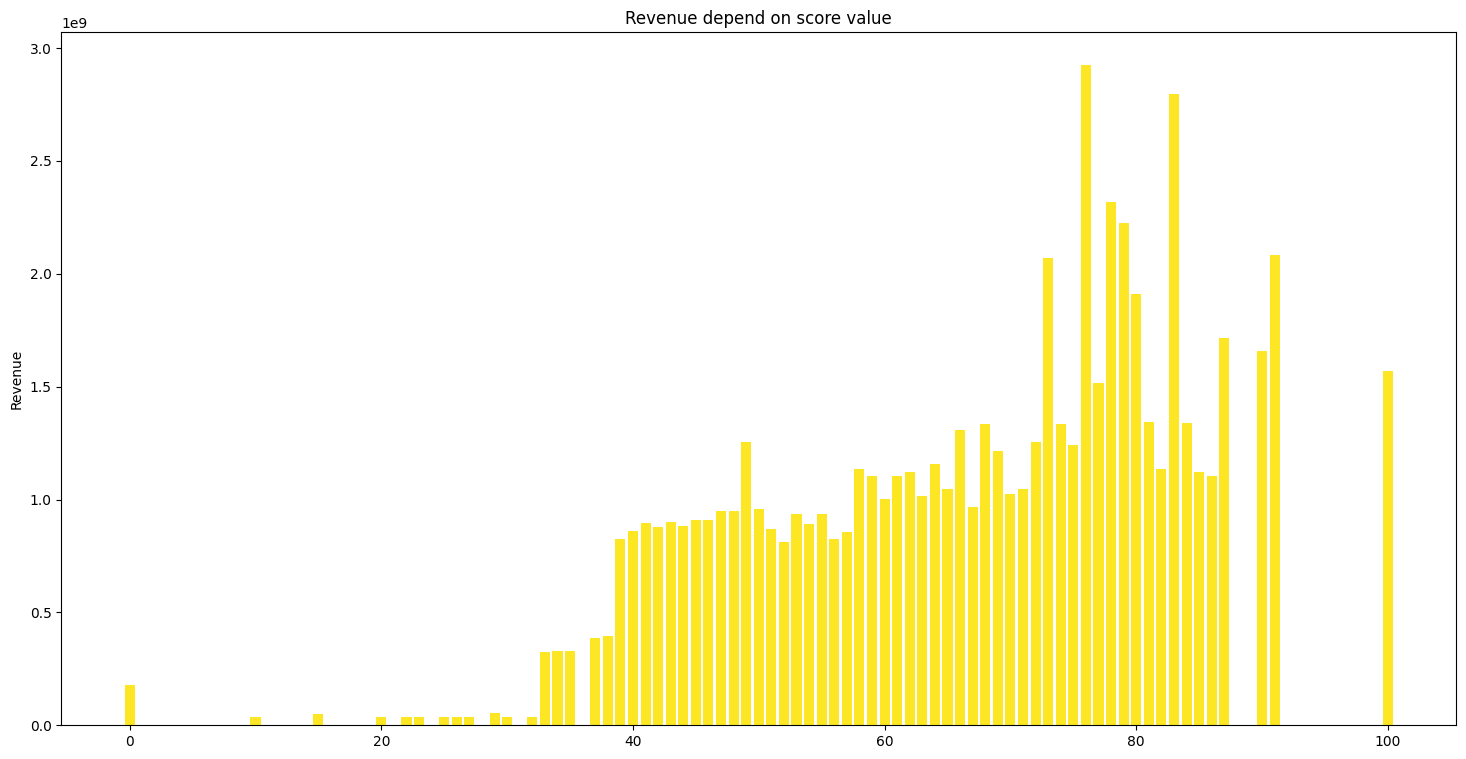

In [ ]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(18,9))
colors = plt.cm.viridis(np.linspace(2, 5, 20))
plt.bar(data["score"],data["revenue"],color=colors)

plt.ticklabel_format(axis='y', style='sci')
plt.title("Revenue depend on score value")
plt.ylabel("Revenue")
plt.show()

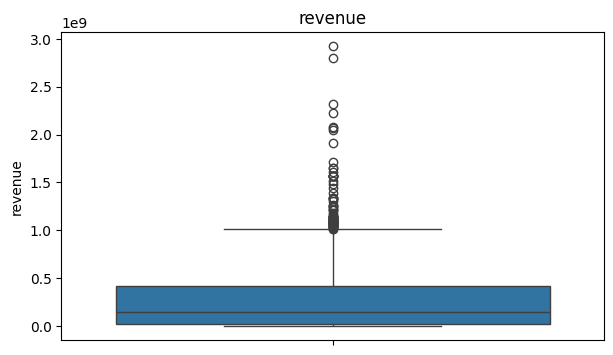

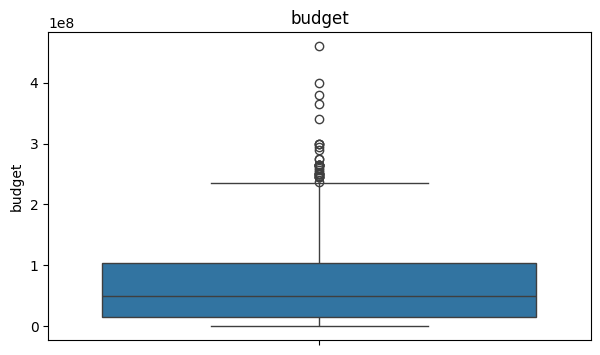

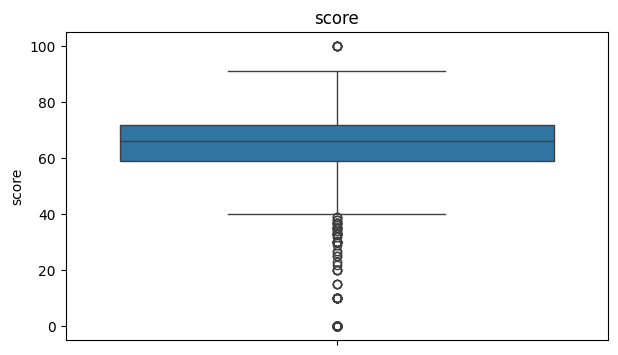

In [ ]:
for i in data[["revenue","budget","score"]]:
  plt.figure(figsize=(7,4))
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

In [ ]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
recommended["index"]=range(0,len(recommended))
recommended=recommended.set_index("index").reset_index()

In [ ]:
selected_features=["genre","crew","language"]
print(selected_features)
for feature in selected_features:
  recommended[feature]=recommended[feature].fillna("")
combined_features=recommended["genre"]+" "+recommended["overview"]+" "+recommended["crew"]

['genre', 'crew', 'language']


In [ ]:
vectorizer=TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(combined_features)
similarity=cosine_similarity(feature_vectors)

In [ ]:
#import required libraries for model building
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
import xgboost as xgb

In [ ]:
data = pd.concat([data, data['genre'].str.get_dummies(',')], axis=1)
val1=data.iloc[:,14:]
val2=data.loc[:,["score","budget"]]

new_data=pd.concat([val1,val2],axis=1)

In [ ]:
# to check the co-relation between the "revenue " and other columns
numeric_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns

for i in numeric_columns:
    if i != "revenue":  # Exclude the target column
        correlation = data["revenue"].corr(data[i])
        print(f"{i}: {correlation}")

score: 0.0994377203601926
budget: 0.7022833902976976
Release_year: 0.16664533685339128
Release_month: 0.01720904084924114
Action: -0.017766167171171174
Adventure: 0.03129982160583354
Animation: 0.14461861783100177
Comedy: -0.0730442636755592
Crime: -0.05677594333106885
Documentary: 0.11716382802014744
Drama: -0.04562281412395417
Family: 0.059608282664552294
Fantasy: -0.014142179526848854
History: -0.005818282974001032
Horror: -0.060646150596709976
Music: 0.020912783257509247
Mystery: 0.00012821590192024117
Romance: 0.03135569626677881
Science Fiction: 0.009651592220840222
TV Movie: 0.04768264247421238
Thriller: -0.015173762988485285
War: -0.0047105221277126035
Western: -0.026444685938709835
 Action: 0.036130266362621774
 Adventure: 0.0827888812326779
 Animation: 0.09397601759719194
 Comedy: 0.057465123277343676
 Crime: -0.07130188732941901
 Documentary: 0.04996792974567883
 Drama: -0.05468034959786165
 Family: 0.0730829643922579
 Fantasy: 0.0868980364157921
 History: -0.044506944634455

In [ ]:
numerical=["budget","score","Release_year"]
x = data[["budget","score","Release_year"]]
y = data["revenue"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

print(x_train.shape,x_test.shape)

(4565, 3) (1142, 3)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
column_transformer = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), numerical)],remainder='passthrough')
featured_xtrain = column_transformer.fit_transform(x_train)
featured_xtest = column_transformer.transform(x_test)

In [ ]:
# Initialize the required model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200,ccp_alpha=0.1,criterion="poisson",min_samples_split=60)
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 1.5,max_depth = 300, alpha = 2, n_estimators = 10)

In [ ]:
# fit the dependent and independent data to the model
model.fit(featured_xtrain,y_train)
model_xgb.fit(featured_xtrain,y_train)

XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=300, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# make prediction by using train dataset
score = model.predict(featured_xtrain)
score_xgb = model_xgb.predict(featured_xtrain)
score_in_test =  model.predict(featured_xtest)
xgb_score_in_test= model_xgb.predict(featured_xtest)

In [ ]:
from sklearn import metrics
# use the train data score to find accuracy

model_score= metrics.mean_squared_error(y_train,score)
r2_score= metrics.r2_score(y_train,score)
model_score_test= metrics.mean_squared_error(y_test,score_in_test)
r2_score_test = metrics.r2_score(y_test,score_in_test)

print("Mean squared error in Random forest: \n","\ntrain data :",model_score,"\ntest data: ",model_score_test)
print("\n\nR2 score in Random forest: \n","\ntrain data :",r2_score,"\ntest data: ",r2_score_test)
print("\n\n")

Mean squared error in Random forest: 
 
train data : 2.171541253257111e+16 
test data:  2.4668351032411144e+16


R2 score in Random forest: 
 
train data : 0.7331201412739858 
test data:  0.671479573175163





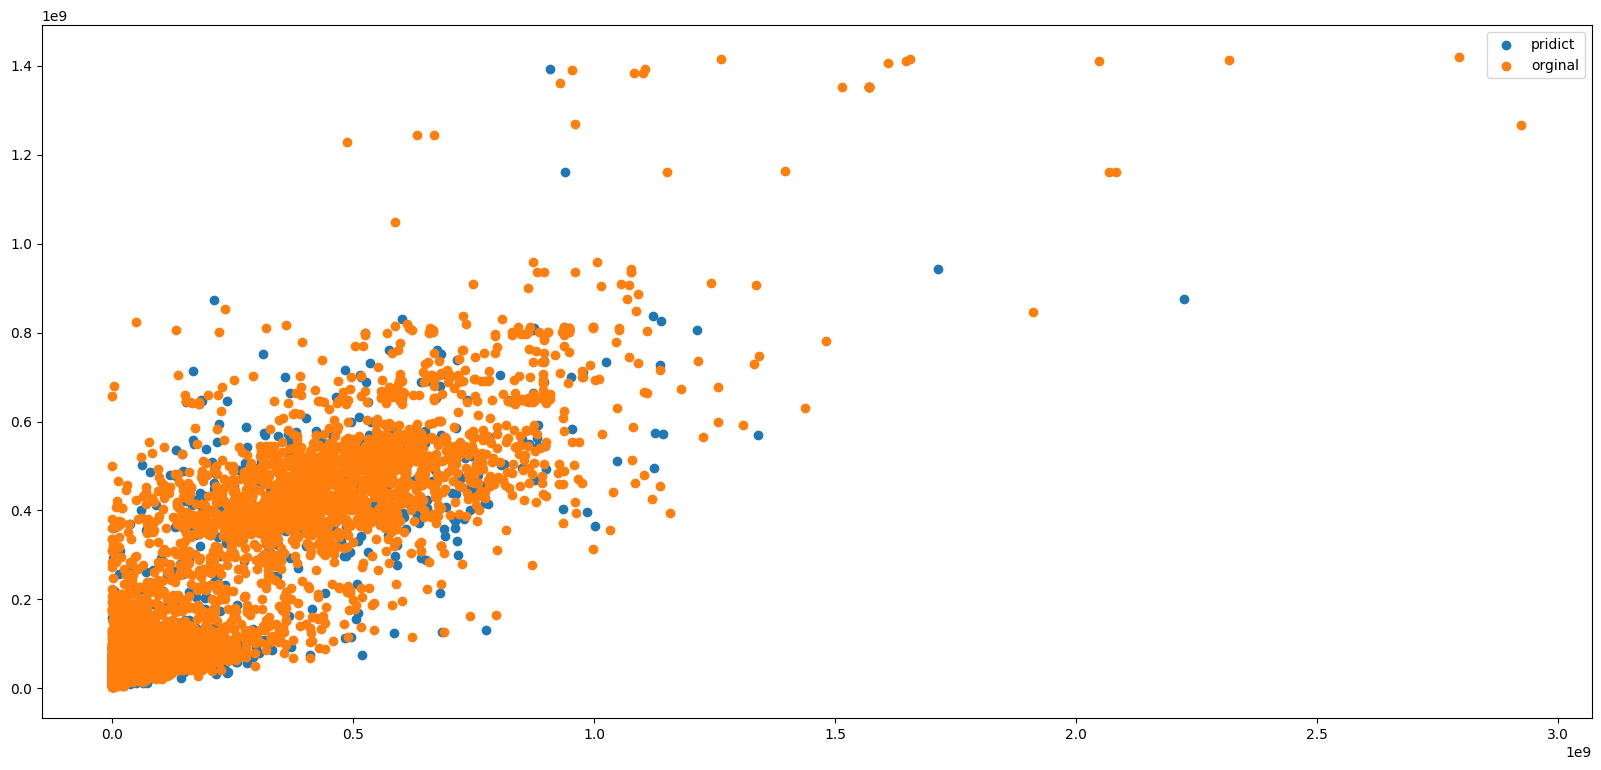

In [ ]:
plt.figure(figsize=(20,9))
plt.scatter(y_test,score_in_test)
plt.scatter(y_train,score)
plt.legend(["pridict","orginal"])

plt.show()

In [ ]:
#make movie recommendation based on your movie which we like
moviename="Iron man"
print("enter your favourite movie name : ",moviename)
list_of_titles=recommended["name"].tolist()
close_match=difflib.get_close_matches(moviename,list_of_titles)
print("similar names :",close_match,"\n\n")
close=close_match[0]
movie_index=recommended[recommended.name==close]["index"].values[0]
similarity_score=list(enumerate(similarity[movie_index]))
similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print("Movies suggested for you : \n")
i=1
for movie in similar_movies:
  index=movie[0]
  title_index=recommended[recommended.index==index]["name"].values[0]
  if(i<=5):
    print(i, ".",title_index)
    i+=1

enter your favourite movie name :  iron man
similar names : ['Iron Man 3', 'Iron Man 2', 'Gridiron Gang'] 


Movies suggested for you : 

1 . Iron Man 3
2 . Iron Man 2
3 . The Invincible Iron Man
4 . Avengers: Age of Ultron
5 . Captain America: Civil War
